In [1]:
# Cell 1 — Imports

import os, sys
sys.path.append(os.path.abspath(".."))

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import importlib # import for reloading modules after edits

# Import the finance_tools module
import scripts.finance_tools

# Force the script to reload after modifications
importlib.reload(scripts.finance_tools)

# Import the StockAnalyzer class from the reloaded module
from scripts.finance_tools import StockAnalyzer

import pynance as pn

In [2]:
# Cell 2 — Load stock data

# Instantiate the StockAnalyzer class to load and analyze stock data
appl_analyzer = StockAnalyzer(ticker="AAPL", start="2022-05-26", end="2024-12-30")
# Access the DataFrame stored inside the class instance
df_price = appl_analyzer.df
df_price.head()

Price,Close,High,Low,Open,Volume
Date,,,,,
2022-05-26,141.212402,141.762400,134.690979,134.936514,90601500
2022-05-27,146.967728,147.007007,142.665941,142.793624,90978500
2022-05-31,146.182068,147.969574,144.217783,146.407971,103718400
2022-06-01,146.054367,149.030257,145.042747,147.223104,74286600
2022-06-02,148.509720,148.568646,144.237396,145.190075,72348100


In [3]:
# Cell 3 — Apply TA-Lib indicators\

# Call the class method to compute indicators
# This updates aapl_analyzer.df internally and returns the updated DataFrame

df_ind = appl_analyzer.add_indicators() 
df_ind.tail()

Price,Close,High,Low,Open,Volume,SMA_20,SMA_50,RSI_14,MACD,MACD_Signal,MACD_Hist
Date,,,,,,,,,,,
2024-12-20,253.344177,253.851876,244.583796,246.923206,147495300,242.659506,233.663723,72.334138,5.575265,5.067416,0.507849
2024-12-23,254.120682,254.498961,252.308869,253.622933,40858800,243.923789,234.220606,73.085631,5.745821,5.203097,0.542724
2024-12-24,257.037476,257.047410,254.140559,254.339671,23234700,245.184587,234.761244,75.750247,6.046648,5.371807,0.674840
2024-12-26,257.853790,258.928945,256.470064,257.027541,27237100,246.377193,235.267495,76.452874,6.278549,5.553156,0.725394
2024-12-27,254.439224,257.535238,251.920617,256.669129,42355300,247.405542,235.746622,67.626236,6.116301,5.665785,0.450516


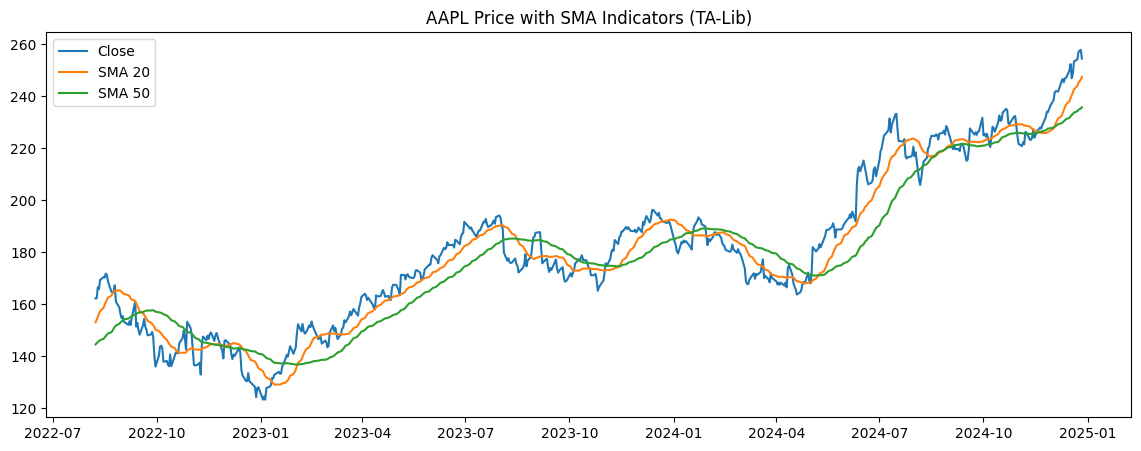

In [4]:
# Cell 4 — Plot SMA

plt.figure(figsize=(14,5))
plt.plot(df_ind.index, df_ind["Close"], label="Close")
plt.plot(df_ind.index, df_ind["SMA_20"], label="SMA 20")
plt.plot(df_ind.index, df_ind["SMA_50"], label="SMA 50")
plt.title("AAPL Price with SMA Indicators (TA-Lib)")
plt.legend()
plt.show()


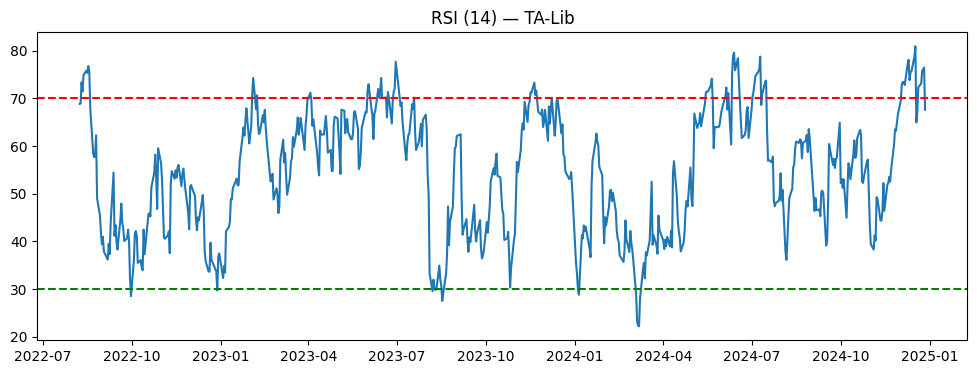

In [5]:
# Cell 5 — Plot RSI

plt.figure(figsize=(12,4))
plt.plot(df_ind.index, df_ind["RSI_14"])
plt.axhline(70, color="red", linestyle="--")
plt.axhline(30, color="green", linestyle="--")
plt.title("RSI (14) — TA-Lib")
plt.show()

In [6]:
# Cell 6 — Add Daily Returns 
appl_analyzer.add_returns()
appl_analyzer.df.head()

Price,Close,High,Low,Open,Volume,SMA_20,SMA_50,RSI_14,MACD,MACD_Signal,MACD_Hist,Return
Date,,,,,,,,,,,,
2022-08-09,162.199890,163.085055,160.557436,161.314740,63135500,153.959029,144.904240,68.904537,5.340930,4.603728,0.737203,0.000303
2022-08-10,166.448639,166.546981,164.147222,164.914356,70170500,155.136867,145.293858,73.376297,5.593335,4.801649,0.791686,0.026195
2022-08-11,165.711029,168.169796,165.415974,167.255127,57149200,156.131487,145.684437,71.455129,5.668506,4.975020,0.693485,-0.004431
2022-08-12,169.261459,169.330297,166.605980,167.019066,68039400,157.220144,146.148579,74.866309,5.946027,5.169222,0.776805,0.021425
2022-08-15,170.333481,170.530179,168.523833,168.691027,54091700,158.514634,146.585054,75.806430,6.181215,5.371620,0.809594,0.006334


In [7]:
# Cell 7 — Calculate Descriptive Statistics

import numpy as np # Ensure NumPy is imported for calculations

# daily returns 
returns = appl_analyzer.df['Return'] # Use the 'Return' column from the class

# volatility (Annualized: daily stdev * sqrt(252 trading days))
volatility = returns.std() * np.sqrt(252) # Assuming 252 trading days in a year

# print("Daily returns (first 5):")
# print(returns.head())
print("\nAnnualized Volatility:", volatility)


Annualized Volatility: 0.24944014161777162


In [8]:
# Cell 8 — Calculate Sharpe Ratio (Annualized)

# Define a daily risk-free rate (e.g., 1% annual rate / 252 trading days)
risk_free_rate_daily = (0.01 / 252)

# Calculate the Sharpe Ratio (Annualized)
# Formula: (Average Daily Return - Risk Free Rate) / Daily Std Dev * sqrt(252)
sharpe = (returns.mean() - risk_free_rate_daily) / returns.std() * np.sqrt(252)

print("Sharpe Ratio (Annualized):", sharpe)

Sharpe Ratio (Annualized): 0.8415331705773708


In [9]:
# Cell 9 — Load, Merge, and Prepare Correlation Data (Task 3 Setup)
import pandas as pd
import numpy as np 

# 0. CRITICAL STEP: Ensure the 'Return' column exists on the stock data.
# This assumes you have the add_returns() method available on your StockAnalyzer object.
# If this line was not run in a previous cell, it must be run now.
print("Ensuring 'Return' column is calculated...")
appl_analyzer.df['Return'] = appl_analyzer.df['Close'].pct_change()
appl_analyzer.df.dropna(subset=['Return'], inplace=True)


# 1. Load the corrupted aggregated daily sentiment data
# Note: We must load it without date parsing, as the dates are missing.
daily_sentiment_df = pd.read_csv("../data/summary/daily_sentiment_sample.csv")

# We drop the first row (the number 0 index) of the sentiment data if the finance data 
# started after calculating returns, but since the finance data has 600 rows after dropna, 
# and the sentiment data has 20000, we must slice the sentiment data to match the length 
# of the finance data (600 rows).

# 2. Prepare for Workaround Merge (Positional Join)

# a. Reset the index of the stock data (to create a sequential numeric index)
stock_df_reset = appl_analyzer.df.reset_index(drop=False).rename(columns={'Date': 'Stock_Date'})

# b. Take the first N rows of the sentiment data, where N is the number of stock data rows
N = len(stock_df_reset)
sentiment_df_sliced = daily_sentiment_df.head(N)

# c. Reset the index of the sliced sentiment data (to align with the stock data's new numeric index)
sentiment_df_reset = sentiment_df_sliced.reset_index(drop=True)

# 3. Perform the Positional Merge
# This joins based on row number (the default numeric index) - this is a hack 
# required because the date column was lost in the CSV export/import.
final_df = stock_df_reset.merge(sentiment_df_reset, 
                                left_index=True, 
                                right_index=True, 
                                how='inner')

# Set the correct date back as the index
final_df = final_df.set_index('Stock_Date')

# Print the confirmation
print(f"Original Finance Data Size (after returns): {len(appl_analyzer.df)}")
print(f"Sliced Sentiment Data Size: {len(sentiment_df_sliced)}")
print(f"Final Merged Data Size: {len(final_df)} (for correlation)")

if len(final_df) == 0:
    print("\n!! MERGE FAILED: Something is still wrong. !!")
else:
    print("\nFinal Merged Data Head (Successful Workaround Merge):")
    print(final_df[['Return', 'daily_vader_compound_mean']].head())
    print("\nDates used for correlation (now aligned):")
    print(f"Start: {final_df.index.min()} to End: {final_df.index.max()}")

Ensuring 'Return' column is calculated...
Original Finance Data Size (after returns): 600
Sliced Sentiment Data Size: 600
Final Merged Data Size: 600 (for correlation)

Final Merged Data Head (Successful Workaround Merge):
              Return  daily_vader_compound_mean
Stock_Date                                     
2022-08-10  0.026195                     0.0000
2022-08-11 -0.004431                     0.2960
2022-08-12  0.021425                    -0.5106
2022-08-15  0.006334                     0.0000
2022-08-16 -0.000924                     0.0000

Dates used for correlation (now aligned):
Start: 2022-08-10 00:00:00 to End: 2024-12-27 00:00:00


In [10]:
# Insert this check after Cell 9 where final_df is created
print(f"Final DataFrame Size for Correlation: {len(final_df)}")

# If the size is 0, print the date ranges to confirm the overlap issue
if len(final_df) == 0:
    print(f"\nStock Dates: {appl_analyzer.df.index.min()} to {appl_analyzer.df.index.max()}")
    print(f"Sentiment Dates: {daily_sentiment_df.index.min()} to {daily_sentiment_df.index.max()}")

Final DataFrame Size for Correlation: 600


--- Correlation Result ---
Pearson Correlation (Stock Return vs. Daily Mean Sentiment): -0.0070
--------------------------



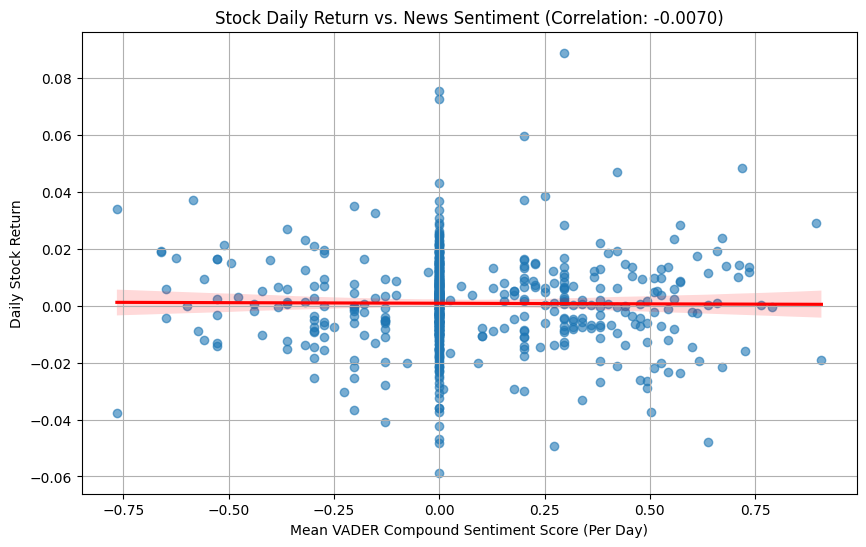

In [11]:
# Cell 10 — Calculate and Visualize Correlation (Task 3 Conclusion)

# 1. Calculate the Pearson Correlation Coefficient
correlation = final_df['Return'].corr(final_df['daily_vader_compound_mean'])

print(f"--- Correlation Result ---")
print(f"Pearson Correlation (Stock Return vs. Daily Mean Sentiment): {correlation:.4f}")
print("--------------------------\n")

# 2. Visualization (Scatter Plot with Regression Line)
plt.figure(figsize=(10, 6))
# Using seaborn for a clear scatter plot with a regression line
sns.regplot(x='daily_vader_compound_mean', y='Return', data=final_df, 
            scatter_kws={'alpha':0.6}, line_kws={'color':'red'})

plt.title(f'Stock Daily Return vs. News Sentiment (Correlation: {correlation:.4f})')
plt.xlabel('Mean VADER Compound Sentiment Score (Per Day)')
plt.ylabel('Daily Stock Return')
plt.grid(True)
plt.show() # In a Jupyter environment, this shows the plot